In [2]:
# importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
dt=pd.read_csv("salary_data.csv")

In [4]:
dt

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [56]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


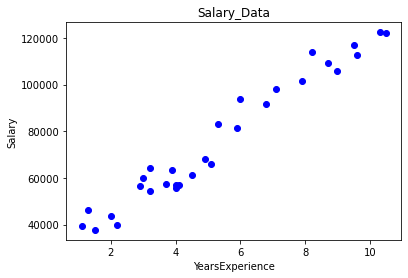

In [28]:
# plotting the data using matplotlib 

plt.scatter(dt["YearsExperience"],dt['Salary'],color="blue")
plt.title("Salary_Data")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [6]:
# checking for null values

dt.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [33]:
# Converting dataset to dependant and independant vectors
# dt["YearsExperience"]
# dt["Salary"]
x=dt.iloc[:, :-1].values
y=dt.iloc[:, 1].values

In [43]:
x.reshape(1,-1)

array([[ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]])

In [44]:
# Splitting the dataset into testing and training set's

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
# Dimensions of datset after splitting into testing and training set's

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [46]:
# Fitting Simple Linear Regression model to the training data

from sklearn.linear_model import LinearRegression

# Instantiating LinearRegression Model

linear_regression = LinearRegression()

# Fitting to the training data

linear_regression.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predicting dependant variable using independant variable

predictions = linear_regression.predict(X_test)

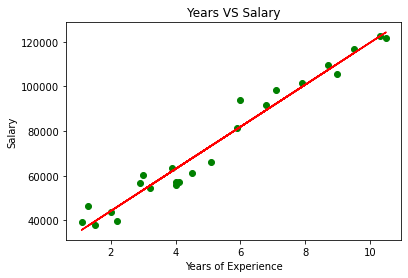

In [54]:
# Training data VS Regression line

plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, linear_regression.predict(X_train), color='red')
plt.title('Years VS Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

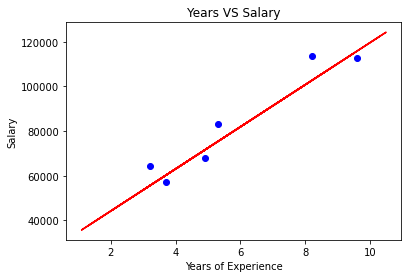

In [55]:
# Test data VS Regression line
# Regression line is drawn using predicted values for test set

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, linear_regression.predict(X_train), color='red')
plt.title('Years VS Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [65]:
# Lets view predicted and original salaries

print('Predicted           -    Original')
for i in range(0, len(predictions)):
    print(f'{predictions[i]:<{25}}{y_test[i]:<{15}}')

Predicted           -    Original
115790.21011287419       112635.0       
71498.2780946286         67938.0        
102596.8686606308        113812.0       
75267.80422384098        83088.0        
55477.79204547594        64445.0        
60189.69970699143        57189.0        


In [66]:
# Lets view predicted and original salaries

print('Predicted           -    Original')
for i in range(0, len(predictions)):
    print(f'{predictions[i]:<{20}}{y_test[i]:<{15}}')

Predicted           -    Original
115790.21011287419  112635.0       
71498.2780946286    67938.0        
102596.8686606308   113812.0       
75267.80422384098   83088.0        
55477.79204547594   64445.0        
60189.69970699143   57189.0        


In [62]:
#import library

from sklearn.metrics import mean_squared_error,r2_score

# model evaluation for training set

y_train_predict = linear_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = linear_regression.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5205.982110155719
R2 score is 0.9645401573418146


The model performance for testing set
--------------------------------------
RMSE is 7059.04362190151
R2 score is 0.9024461774180497
